In [597]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Q51. neighbourhood 값과 neighbourhood_group 값에 따른 price의 평균**

In [598]:
Ans = df.groupby(['neighbourhood', 'neighbourhood_group']).price.mean()
Ans

,,price
neighbourhood,neighbourhood_group,
Allerton,Bronx,87.595238
Arden Heights,Staten Island,67.250000
Arrochar,Staten Island,115.000000
Arverne,Queens,171.779221
Astoria,Queens,117.187778
...,...,...
Windsor Terrace,Brooklyn,138.993631
Woodhaven,Queens,67.170455
Woodlawn,Bronx,60.090909


**Q52. neighbourhood 값과 neighvbourhood_group값에 따른 price의 평균을 계층적 indexing 없이 구하기**

In [599]:
Ans = df.groupby(['neighbourhood', 'neighbourhood_group']).price.mean().unstack()
Ans

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,NaN,NaN,NaN,NaN
Arden Heights,NaN,NaN,NaN,NaN,67.25
Arrochar,NaN,NaN,NaN,NaN,115.00
Arverne,NaN,NaN,NaN,171.779221,NaN
Astoria,NaN,NaN,NaN,117.187778,NaN
...,...,...,...,...,...
Windsor Terrace,NaN,138.993631,NaN,NaN,NaN
Woodhaven,NaN,NaN,NaN,67.170455,NaN
Woodlawn,60.090909,NaN,NaN,NaN,NaN


**Q53. neighbourhood 값과 neighbourhood_group 값에 따른 price의 평균을 계층적 indexing 없이 구하고 nan 값은 -999 값으로 채우기**

In [600]:
Ans = df.groupby(['neighbourhood', 'neighbourhood_group']).price.mean().unstack().fillna(-999)
Ans

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,87.595238,-999.000000,-999.0,-999.000000,-999.00
Arden Heights,-999.000000,-999.000000,-999.0,-999.000000,67.25
Arrochar,-999.000000,-999.000000,-999.0,-999.000000,115.00
Arverne,-999.000000,-999.000000,-999.0,171.779221,-999.00
Astoria,-999.000000,-999.000000,-999.0,117.187778,-999.00
...,...,...,...,...,...
Windsor Terrace,-999.000000,138.993631,-999.0,-999.000000,-999.00
Woodhaven,-999.000000,-999.000000,-999.0,67.170455,-999.00
Woodlawn,60.090909,-999.000000,-999.0,-999.000000,-999.00


**Q54. 데이터중 neighbourhood_group 값이 Queens값을 가지는 데이터들 중 neighbourhood 그룹별로 price값의 평균, 분산, 최대, 최소값 구하기**

In [601]:
Ans = df[df['neighbourhood_group']=='Queens'].groupby(['neighbourhood']).price.agg(['mean','var','max','min'])
Ans.head()

,mean,var,max,min
neighbourhood,,,,
Arverne,171.779221,37383.411141,1500,35
Astoria,117.187778,122428.811196,10000,25
Bay Terrace,142.000000,6816.400000,258,32
Bayside,157.948718,166106.470985,2600,30
Bayswater,87.470588,2330.889706,230,45


**Q55. 데이터중 neighbourhood_group 값에 따른 room_type컬럼의 숫자를 구하고 neighbourhood_group값을 기준으로 각 값의 비율 구하기**

In [602]:
Ans = df[['neighbourhood_group', 'room_type']].groupby(['neighbourhood_group', 'room_type']).size().unstack()
Ans.loc[:,:] = (Ans.values / Ans.sum(axis=1).values.reshape(-1,1))
Ans

<ipython-input-602-1c807f198510>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.34738772 0.47547752 0.60934398 0.36992587 0.47184987]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ans.loc[:,:] = (Ans.values / Ans.sum(axis=1).values.reshape(-1,1))
<ipython-input-602-1c807f198510>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.59761687 0.50397931 0.36849638 0.59512884 0.50402145]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ans.loc[:,:] = (Ans.values / Ans.sum(axis=1).values.reshape(-1,1))
<ipython-input-602-1c807f198510>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05499542 0.02054318 0.02215964 0.03494529 0.02412869]' has dtype incompatible with int64, please explicitly

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475478,0.503979,0.020543
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129


# 04. Apply , Map

**Q56. 데이터를 로드하고 데이터 행과 열의 갯수를 출력**

In [603]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv')
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816


**Q57. Income_Category의 카테고리를 map 함수를 이용하여 다음과 같이 변경하여 newIncome 컬럼에 매핑하라**

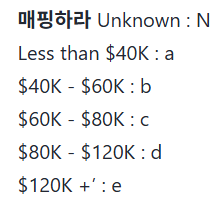

In [604]:
dic={
    'Unknown' : 'N',
    'Less than $40K' : 'a',
    '$40K - $60K'    : 'b',
    '$60K - $80K'    : 'c',
    '$80K - $120K'   : 'd',
    '$120K +'        : 'e'
}
df['newIncome'] = df['Income_Category'].map(lambda x: dic[x])
Ans = df['newIncome']
Ans

,newIncome
0,c
1,a
2,d
3,a
4,c
...,...
10122,b
10123,b
10124,a
10125,b


**Q58. Income_Category의 카테고리를 apply 함수를 이용하여 다음과 같이 변경하여 newIncome 컬럼에 매핑하라**

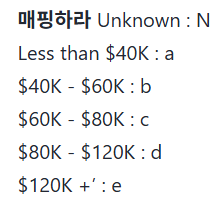

In [605]:
def changeCategory(x):
    if x == 'Unknown':
        return 'N'
    elif x == 'Less than $40K':
        return 'a'
    elif x == '$40K - $60K':
        return 'b'
    elif x == '$60K - $80K':
        return 'c'
    elif x == '$80K - $120K':
        return 'd'
    elif x == '$120K +':
        return 'e'
df['newIncome'] = df['Income_Category'].apply(changeCategory)
Ans = df['newIncome']
Ans

,newIncome
0,c
1,a
2,d
3,a
4,c
...,...
10122,b
10123,b
10124,a
10125,b


**Q59. Customer_Age의 값을 이용하여 나이 구간을 AgeState 컬럼으로 정의하라. (0~9 : 0, 10~19 : 10, 20~29 : 20 ...) 각 구간의 빈도수 출력**

In [606]:
df['AgeState'] = df['Customer_Age'].map(lambda x : x//10*10)
Ans = df['AgeState'].value_counts().sort_index()
Ans

,count
AgeState,
20,195
30,1841
40,4561
50,2998
60,530
70,2


**Q60. Education_Level의 값중 Graduate 단어가 포함되는 값은 1, 그렇지 않은 경우에는 0으로 변경하여 newEduLevel 컬럼을 정의하고 빈도수를 출력**

In [607]:
def a(x):
    if 'Graduate' in x:
        return 1
    else:
        return 0
df['newEduLevel'] = df['Education_Level'].apply(a)
Ans = df['newEduLevel'].value_counts().sort_index()
Ans

,count
newEduLevel,
0,6483
1,3644


In [608]:
df['newEduLevel'] = df['Education_Level'].map(lambda x : 1 if 'Graduate' in x else 0)
Ans = df['newEduLevel'].value_counts()
Ans

,count
newEduLevel,
0,6483
1,3644


**Q61. Credit_Limit 컬럼값이 4500 이상인 경우 1, 그 외의 경우에는 모두 0으로 하는 newLimit 정의. newLimit 각 값들의 빈도수 출력**

In [609]:
df['newLimit'] = df['Credit_Limit'].map(lambda x : 1 if x >= 4500 else 0)
Ans = df['newLimit'].value_counts()
Ans

,count
newLimit,
1,5096
0,5031


**Q62. Marital_Status 컬럼값이 Married이고 Card_Category 컬럼의 값이 Platinum인 경우 1 그외의 경우에는 모두 0으로 하는 newState컬럼을 정의. newState의 각 값들의 빈도수 출력**

In [610]:
def a(x):
    if x['Marital_Status']=='Married' and x['Card_Category']=='Platinum':
        return 1
    else:
        return 0
df['newState'] = df.apply(a, axis=1)
Ans = df['newState'].value_counts()
Ans

,count
newState,
0,10120
1,7


**Q63. Gender 컬럼값 M인 경우 male, F인 경우 female로 값을 변경하여 Gender 컬럼에 새롭게 정의. 각 value의 빈도 출력**

In [611]:
df['Gender'] = df['Gender'].map(lambda x: 'male' if x=='M' else 'female')
Ans = df['Gender'].value_counts()
Ans

,count
Gender,
female,5358
male,4769


# 05_Time_Series

**Q64. 데이터를 로드하고 각 열의 데이터 타입 파악**

In [612]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/timeTest.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yr_Mo_Dy  6574 non-null   object 
 1   RPT       6568 non-null   float64
 2   VAL       6571 non-null   float64
 3   ROS       6572 non-null   float64
 4   KIL       6569 non-null   float64
 5   SHA       6572 non-null   float64
 6   BIR       6574 non-null   float64
 7   DUB       6571 non-null   float64
 8   CLA       6572 non-null   float64
 9   MUL       6571 non-null   float64
 10  CLO       6573 non-null   float64
 11  BEL       6574 non-null   float64
 12  MAL       6570 non-null   float64
dtypes: float64(12), object(1)
memory usage: 667.8+ KB


**Q65. Yr_Mo_Dy을 판다스에서 인식할수 있는 datetime64타입으로 변경**

In [613]:
df['Yr_Mo_Dy'] = pd.to_datetime(df['Yr_Mo_Dy'])
df['Yr_Mo_Dy']

,Yr_Mo_Dy
0,2061-01-01
1,2061-01-02
2,2061-01-03
3,2061-01-04
4,2061-01-05
...,...
6569,1978-12-27
6570,1978-12-28
6571,1978-12-29
6572,1978-12-30


**Q66. Yr_Mo_Dy에 존재하는 년도의 유일값을 모두 출력**

In [614]:
Ans = df['Yr_Mo_Dy'].dt.year.unique()
Ans

array([2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978], dtype=int32)

**Q67. Yr_Mo_Dy에 년도가 2061년 이상의 경우에는 모두 잘못된 데이터다. 해당경우의 값은 100을 빼서 새롭게 날짜를 Yr_Mo_Dy 컬럼에 정의**

In [615]:
def a(x):
    import datetime
    year = x.year - 100 if x.year>=2061 else x.year
    return pd.to_datetime(datetime.date(year, x.month, x.day))
df['Yr_Mo_Dy']=df['Yr_Mo_Dy'].apply(a)
df

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


**Q68. 년도별 각컬럼의 평균값을 구하기**

In [616]:
Ans = df.groupby(df['Yr_Mo_Dy'].dt.year).mean()
Ans.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,,
1961,1961-07-02 00:00:00,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,1962-07-02 00:00:00,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,1963-07-02 00:00:00,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,1964-07-01 12:00:00,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,1965-07-02 00:00:00,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644


**Q69. weekday컬럼을 만들고 요일별로 매핑하라(월:0~일:6)**

In [617]:
df['weekday'] = df['Yr_Mo_Dy'].dt.weekday
Ans = df['weekday'].to_frame()
Ans

,weekday
0,6
1,0
2,1
3,2
4,3
...,...
6569,2
6570,3
6571,4
6572,5


**Q70. weekday컬럼을 기준으로 주말이면 1 평일이면 0의 값을 가지는 WeekCheck 컬럼을 만들어라**

In [618]:
df['weekday'] = df['Yr_Mo_Dy'].dt.weekday
Ans = df['weekday'].map(lambda x: 1 if x>=5 else 0)
Ans

,weekday
0,1
1,0
2,0
3,0
4,0
...,...
6569,0
6570,0
6571,0
6572,1


**Q71. 년도, 일자 상관없이 모든 컬럼의 각 달의 평균을 구하기**

In [619]:
Ans = df.groupby(df['Yr_Mo_Dy'].dt.month).mean()
Ans

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday
Yr_Mo_Dy,,,,,,,,,,,,,,
1,1969-07-17 06:40:00.000000000,14.847325,12.914560,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.550520,18.028763,2.989247
2,1969-08-17 07:50:33.070866142,13.710906,12.111122,12.879132,6.942411,11.551772,7.633858,11.206024,9.341437,9.313169,9.518051,13.728898,17.156142,3.005906
3,1969-09-14 12:00:00.000000000,13.158687,11.505842,12.648118,7.265907,11.554516,7.959409,11.310179,9.635896,9.700324,10.096953,13.810609,16.909317,3.000000
4,1969-10-15 00:00:00.000000000,12.555648,10.429759,12.204815,6.898037,10.677667,7.441389,10.221315,8.909056,8.930870,9.158019,12.664759,14.937611,3.011111
5,1969-11-14 12:00:00.000000000,11.724032,10.145619,11.550394,6.307487,10.224301,6.942061,8.797738,8.452903,8.040806,8.524857,12.767258,13.736039,2.982079
6,1969-12-15 00:00:00.000000000,10.451317,8.949704,10.361315,5.652278,9.529926,6.410093,8.009556,7.920796,7.639796,7.729185,12.246407,12.861818,3.007407
7,1970-01-14 12:00:00.000000000,9.992007,8.357778,9.349642,5.416935,9.302634,5.972348,7.843501,7.262760,7.544480,7.321416,11.676505,12.800789,3.001792
8,1970-02-14 12:00:00.000000000,10.213411,8.415143,9.993441,5.270681,8.901559,5.891057,7.772312,6.842025,7.240573,7.002783,11.110090,12.565943,2.991039
9,1970-03-17 00:00:00.000000000,11.458519,9.981002,10.756883,5.615176,9.766315,6.566222,8.609722,7.745677,7.610556,7.689278,12.686389,14.761963,3.009259


**Q72. 모든 결측치는 컬럼기준 직전의 값으로 대체하고 첫번째 행에 결측치가 있을 경우 뒤에 있는 값으로 대체**

In [620]:
df = df.fillna(method='ffill').fillna(method='bfill')
df
#ffill = 앞에 있는걸로 채운다. bfill = 뒤에 있는걸로 채운다

<ipython-input-620-ba28b098995b>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday
0,1961-01-01,15.04,14.96,13.17,9.29,12.62,9.87,13.67,10.25,10.83,12.58,18.50,15.04,6
1,1961-01-02,14.71,14.96,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,0
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,10.04,8.50,7.67,12.75,12.71,1
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,2
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,3
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,4
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,5


**Q73. 년도-월을 기준으로 모든 컬럼의 평균값 구하기**

In [621]:
Ans = df.groupby([df['Yr_Mo_Dy'].dt.year, df['Yr_Mo_Dy'].dt.month]).mean()
Ans.head()

Yr_Mo_Dy        RPT        VAL        ROS  \
Yr_Mo_Dy Yr_Mo_Dy                                                        
1961     1        1961-01-16 00:00:00  14.932581  12.084194  13.431613   
         2        1961-02-14 12:00:00  16.269286  14.975357  14.324643   
         3        1961-03-16 00:00:00  11.015806  11.296452  10.752903   
         4        1961-04-15 12:00:00  10.722667   9.427667   9.998000   
         5        1961-05-16 00:00:00   9.860968   8.735161  10.818065   

                        KIL        SHA        BIR        DUB        CLA  \
Yr_Mo_Dy Yr_Mo_Dy                                                         
1961     1         7.736774  11.215806   8.588065  11.184839   9.270968   
         2         9.116786  13.852143  10.937500  11.890714  11.846071   
         3         7.137742  10.509355   8.866774   9.644194   9.829677   
         4         5.830667   8.435000   6.495000   6.925333   7.094667   
         5         5.892258   9.490323   6.574839   7.477097   8.177097   

                         MUL        CLO        BEL        MAL   weekday  
Yr_Mo_Dy Yr_Mo_Dy                                                        
1961     1          9.085806  10.107419  13.880968  14.703226  2.935484  
         2         11.821429  12.714286  18.583214  15.411786  3.000000  
         3         10.646129  11.251935  16.410968  15.637742  3.000000  
         4          7.342333   7.237000  11.147333  10.278333  3.166667  
         5          8.039355   8.499355  11.900323  12.011613  2.806452

In [622]:
Ans = df.groupby(df['Yr_Mo_Dy'].dt.to_period('M')).mean()
Ans.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,weekday
Yr_Mo_Dy,,,,,,,,,,,,,,
1961-01,1961-01-16 00:00:00,14.932581,12.084194,13.431613,7.736774,11.215806,8.588065,11.184839,9.270968,9.085806,10.107419,13.880968,14.703226,2.935484
1961-02,1961-02-14 12:00:00,16.269286,14.975357,14.324643,9.116786,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786,3.000000
1961-03,1961-03-16 00:00:00,11.015806,11.296452,10.752903,7.137742,10.509355,8.866774,9.644194,9.829677,10.646129,11.251935,16.410968,15.637742,3.000000
1961-04,1961-04-15 12:00:00,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333,3.166667
1961-05,1961-05-16 00:00:00,9.860968,8.735161,10.818065,5.892258,9.490323,6.574839,7.477097,8.177097,8.039355,8.499355,11.900323,12.011613,2.806452


**Q74. RPT 컬럼의 값을 일자별 기준으로 1차 차분**

In [623]:
df['RPT'].diff()

,RPT
0,NaN
1,-0.33
2,3.79
3,-7.92
4,2.75
...,...
6569,3.75
6570,-4.37
6571,0.79
6572,4.50


**Q75. RPT와 VAL의 컬럼을 일주일 간격으로 각각 이동평균한 값 구하기**

In [624]:
Ans = df[['RPT', 'VAL']].rolling(7).mean()
Ans

,RPT,VAL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
6569,11.868571,9.362857
6570,11.904286,9.595714
6571,13.017143,10.011429
6572,13.285714,10.118571


**Q76. 년-월-일:시 컬럼을 pandas에서 인식할 수 있는 datetime 형태로 변경. 서울시의 제공데이터의 경우 0시가 24시로 표현됨**

In [625]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/seoul_pm.csv')
df

,(년-월-일:시),PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스
0,2021-05-15:15,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003
1,2021-05-15:14,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003
2,2021-05-15:13,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004
3,2021-05-15:12,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004
4,2021-05-15:11,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2021-03-25:05,보통,39.0,보통,18.0,좋음,0.026,좋음,0.025,좋음,0.4,좋음,0.003
1235,2021-03-25:04,보통,34.0,좋음,15.0,좋음,0.017,보통,0.033,좋음,0.4,좋음,0.002
1236,2021-03-25:03,보통,35.0,좋음,13.0,좋음,0.029,좋음,0.025,좋음,0.4,좋음,0.003
1237,2021-03-25:02,보통,35.0,좋음,13.0,보통,0.031,좋음,0.025,좋음,0.3,좋음,0.003


In [626]:
def change_date(x):
    import datetime
    hour = x.split(':')[1]
    date = x.split(":")[0]

    if hour =='24':
        hour ='00:00:00'

        FinalDate = pd.to_datetime(date +" "+hour) +datetime.timedelta(days=1)

    else:
        hour = hour +':00:00'
        FinalDate = pd.to_datetime(date +" "+hour)

    return FinalDate

df['(년-월-일:시)'] = df['(년-월-일:시)'].apply(change_date)

Ans = df
Ans

,(년-월-일:시),PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스
0,2021-05-15 15:00:00,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003
1,2021-05-15 14:00:00,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003
2,2021-05-15 13:00:00,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004
3,2021-05-15 12:00:00,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004
4,2021-05-15 11:00:00,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2021-03-25 05:00:00,보통,39.0,보통,18.0,좋음,0.026,좋음,0.025,좋음,0.4,좋음,0.003
1235,2021-03-25 04:00:00,보통,34.0,좋음,15.0,좋음,0.017,보통,0.033,좋음,0.4,좋음,0.002
1236,2021-03-25 03:00:00,보통,35.0,좋음,13.0,좋음,0.029,좋음,0.025,좋음,0.4,좋음,0.003
1237,2021-03-25 02:00:00,보통,35.0,좋음,13.0,보통,0.031,좋음,0.025,좋음,0.3,좋음,0.003


**Q77. 일자별 영어요일 이름을 dayName 컬럼에 저장**

In [627]:
df['dayName'] = df['(년-월-일:시)'].dt.day_name()
Ans = df['dayName']
Ans

,dayName
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday
...,...
1234,Thursday
1235,Thursday
1236,Thursday
1237,Thursday


**Q78. 일자별 각 PM10등급의 빈도수 파악하기**

In [628]:
df[['(년-월-일:시)','PM10등급']].groupby([df['(년-월-일:시)'].dt.date,'PM10등급']).size().unstack().fillna(0).astype(int)

PM10등급,나쁨,매우나쁨,보통,좋음
(년-월-일:시),,,,
2021-03-25,11,0,12,0
2021-03-26,21,3,0,0
2021-03-27,13,0,9,2
2021-03-28,0,0,2,22
2021-03-29,1,21,1,1
2021-03-30,3,10,11,0
2021-03-31,0,0,24,0
2021-04-01,0,0,24,0
2021-04-02,0,0,24,0


In [629]:
Ans1 = df.groupby(['dayName','PM10등급'],as_index=False).size()
Ans1.head()

,dayName,PM10등급,size
0,Friday,나쁨,31
1,Friday,매우나쁨,17
2,Friday,보통,120
3,Friday,좋음,21
4,Monday,나쁨,1


In [630]:
Ans2 = Ans1.pivot(index='dayName',columns='PM10등급',values='size').fillna(0)
Ans2.head()

PM10등급,나쁨,매우나쁨,보통,좋음
dayName,,,,
Friday,31.0,17.0,120.0,21.0
Monday,1.0,21.0,83.0,63.0
Saturday,31.0,27.0,71.0,54.0
Sunday,2.0,1.0,67.0,98.0
Thursday,41.0,0.0,144.0,5.0


**Q79. 시간이 연속적으로 존재하며 결측치가 없는지 확인하라**

In [631]:
# 시간을 차분했을 경우 첫 값은 nan, 이후 모든 차분값이 동일하면 연속이라 판단한다.
check = len(df['(년-월-일:시)'].diff().unique())
if check ==2:
    Ans =True
else:
    Ans = False
Ans

True

In [632]:
df['(년-월-일:시)'].diff().dropna().unique()

<TimedeltaArray>
['-1 days +23:00:00']
Length: 1, dtype: timedelta64[ns]

In [633]:
df.head()

,(년-월-일:시),PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스,dayName
0,2021-05-15 15:00:00,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003,Saturday
1,2021-05-15 14:00:00,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003,Saturday
2,2021-05-15 13:00:00,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004,Saturday
3,2021-05-15 12:00:00,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004,Saturday
4,2021-05-15 11:00:00,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005,Saturday


**Q80. 오전 10시와 오후 10(22)시의 PM10의 평균값을 각각 구하라**

In [634]:
df.groupby(df['(년-월-일:시)'].dt.hour)['PM10'].mean()[[10,22]]

,PM10
(년-월-일:시),
10,70.384615
22,69.941176


**Q81. 날짜 컬럼을 index로 만들기**

In [637]:
df=df.set_index('(년-월-일:시)')
df

,PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스,dayName
(년-월-일:시),,,,,,,,,,,,,
2021-05-15 15:00:00,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003,Saturday
2021-05-15 14:00:00,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003,Saturday
2021-05-15 13:00:00,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004,Saturday
2021-05-15 12:00:00,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004,Saturday
2021-05-15 11:00:00,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 05:00:00,보통,39.0,보통,18.0,좋음,0.026,좋음,0.025,좋음,0.4,좋음,0.003,Thursday
2021-03-25 04:00:00,보통,34.0,좋음,15.0,좋음,0.017,보통,0.033,좋음,0.4,좋음,0.002,Thursday
2021-03-25 03:00:00,보통,35.0,좋음,13.0,좋음,0.029,좋음,0.025,좋음,0.4,좋음,0.003,Thursday


**Q82. 데이터를 주단위로 뽑아서 최소, 최대, 평균, 표준표차 구하기**

In [638]:
df.select_dtypes(exclude='object').resample('W').agg(['min','max','mean','std'])

PM10                                 PM2.5                    \
             min     max        mean         std   min    max       mean   
(년-월-일:시)                                                                  
2021-03-28   6.0   160.0   72.747368   43.345462   4.0  113.0  44.705263   
2021-04-04   3.0   598.0   97.148810  129.911976   1.0  120.0  23.168675   
2021-04-11  17.0   102.0   41.059524   16.325911   7.0   70.0  21.761905   
2021-04-18   3.0   367.0   48.180723   43.254468   2.0   38.0  17.066265   
2021-04-25  17.0   126.0   55.119048   26.659936   7.0   61.0  26.392857   
2021-05-02   3.0    97.0   40.612121   24.813103   1.0   43.0  16.644578   
2021-05-09   8.0  1024.0  161.660714  239.679148   3.0  172.0  34.738095   
2021-05-16  16.0   111.0   40.014815   21.876855   7.0   76.0  21.577778   

                          오존         ...     이산화질소           일산화탄소       \
                  std    min    max  ...      mean       std   min  max   
(년-월-일:시)                            ...                                  
2021-03-28  29.551928  0.002  0.085  ...  0.044579  0.023722   0.3  1.4   
2021-04-04  22.399578  0.003  0.055  ...  0.027929  0.014978   0.3  0.9   
2021-04-11  11.479343  0.009  0.070  ...  0.022583  0.009562   0.3  0.7   
2021-04-18   7.867952  0.002  0.070  ...  0.023753  0.013553   0.3  0.6   
2021-04-25  13.094788  0.006  0.090  ...  0.028571  0.014640   0.3  0.8   
2021-05-02   8.850965  0.003  0.064  ...  0.020428  0.011676   0.3  0.6   
2021-05-09  39.788248  0.002  0.073  ...  0.024187  0.012371   0.3  1.0   
2021-05-16  15.622633  0.004  0.123  ...  0.030793  0.009503   0.3  0.8   

                                아황산가스                             
                mean       std    min    max      mean       std  
(년-월-일:시)                                                         
2021-03-28  0.611579  0.232408  0.002  0.006  0.003274  0.000961  
2021-04-04  0.445833  0.135741  0.002  0.004  0.002732  0.000541  
2021-04-11  0.389286  0.087573  0.002  0.004  0.002744  0.000569  
2021-04-18  0.386747  0.084954  0.002  0.004  0.002464  0.000579  
2021-04-25  0.457143  0.122142  0.001  0.011  0.003631  0.001763  
2021-05-02  0.392771  0.092485  0.001  0.006  0.002524  0.000768  
2021-05-09  0.419277  0.103230  0.002  0.004  0.002771  0.000579  
2021-05-16  0.440741  0.094075  0.001  0.006  0.002459  0.001696  

[8 rows x 24 columns]